# Importing Pacakages

In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('punkt')
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


# Reading data

In [4]:
df = pd.read_csv('train.csv')
df = df.sample(frac = 1)
df

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
2800950,2,Very Cool Watch,I didn't know how to set the watch when I got ...
694253,1,not as rigorous,I was a little disappointed in the intensity o...
1093492,2,The DCC1200 makes a great cup of coffee!,I had the cuisinart grind and brew. Did not li...
1764000,2,Just as promised - even my jerk of a cat could...,I searched amazon.com and ended up selecting t...
1080476,2,better than first Polyphonica,This takes place before the first Polyphonica ...
...,...,...,...
1483639,2,where the red fern grows,I think that this is a great book!It is a book...
3228430,2,"Ah, nostalgia!","Okay, this game isn't very pretty, nor is it a..."
1512169,2,Architecture In Helsinki pushes the musical bo...,It's hard to describe this album since there a...
2573872,1,Please don't waste your money!,I bought this last year at a Whole Foods store...


In [5]:
df.head(5)

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
2800950,2,Very Cool Watch,I didn't know how to set the watch when I got ...
694253,1,not as rigorous,I was a little disappointed in the intensity o...
1093492,2,The DCC1200 makes a great cup of coffee!,I had the cuisinart grind and brew. Did not li...
1764000,2,Just as promised - even my jerk of a cat could...,I searched amazon.com and ended up selecting t...
1080476,2,better than first Polyphonica,This takes place before the first Polyphonica ...


In [6]:
df.dropna(inplace = True)

In [7]:
df.columns = ['Rating', 'Title', 'Review']

# EDA

In [8]:
df = df.sample(100_000)

In [9]:
df['Rating'].value_counts()

Rating
2    50059
1    49941
Name: count, dtype: int64

In [10]:
df["Title_review"] = df['Title'] + " " + df['Review']
df = df.drop(['Title','Review'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 335267 to 640403
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Rating        100000 non-null  int64 
 1   Title_review  100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


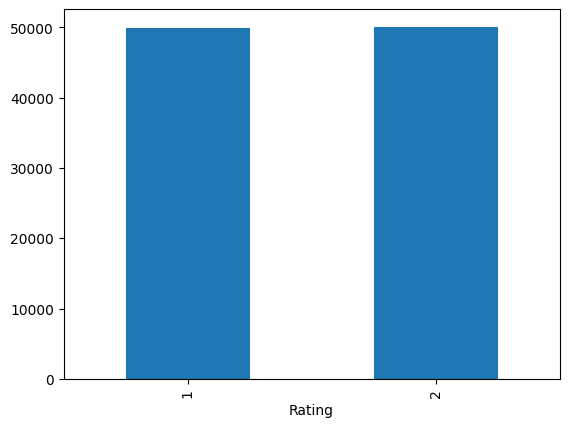

In [12]:
# Analyzing data 
df.groupby('Rating').Rating.count().plot.bar()
plt.show()

# Data Preprocessing

In [13]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [14]:
print(df.columns)

Index(['Rating', 'Title_review'], dtype='object')


In [15]:
df['Title_review'].iloc[0]

"victum of bait and switch I ordered 6 supreme moo mixers. They did arrive before Christmas. I received 6 standard moo mixers that should have been priced lower. I notified the company of the error and didn't receive a response. Very disappointed. Shame on them. I'm a victum of bait and switch....."

In [16]:
# Data Cleaning using stemmer
stemmer = PorterStemmer()
def apply_stemming(text):
    if pd.isna(text):
        return None
    for word in text.splittes
df['Review'] = df['Title_review'].apply(lambda x: apply_stemming(x))


In [17]:
df = df.drop(['Title_review'], axis=1)

In [18]:
df

,Rating,Review
335267,1,victum of bait and switch i order 6 suprem moo...
450841,1,love the film ; hate ultra violet copi ! ! ! !...
140590,2,a must have for women everi woman ( marri or i...
3027796,2,"bought three my daughter , son and son-in-law ..."
1362015,2,"clear , well written it wa a pleasur to read t..."
...,...,...
360647,1,doe n't work the network could n't find the pr...
250040,1,"leak leak leak ye they leak , i mean pour milk..."
1409671,2,"simpl , eleg , intellig i realli enjoy thi boo..."
1501835,1,teen gangbang with cool accent and bad makeup ...


In [18]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['Review'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['Review']]
df['Review'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['Review']))

In [ ]:
df.head(5)

In [21]:
# Training model

from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['Review']
Y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

#Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])
model = pipeline.fit(X, Y)

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_rating = model.predict(X_test)
print(accuracy_score(y_test,predict_rating))

0.8851333333333333


In [28]:
review = input("Enter review = ")
review_data = {'predict_rating':[review]}
review_data_df = pd.DataFrame(review_data)
predict_news_cat = model.predict(review_data_df['predict_rating'])
print("Predicted rating  = ",predict_rating[0])

Enter review = bad
Predicted rating  =  2


In [25]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

           1       0.89      0.88      0.88      7456
           2       0.89      0.89      0.89      7544

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

[[6587  854]
 [ 869 6690]]


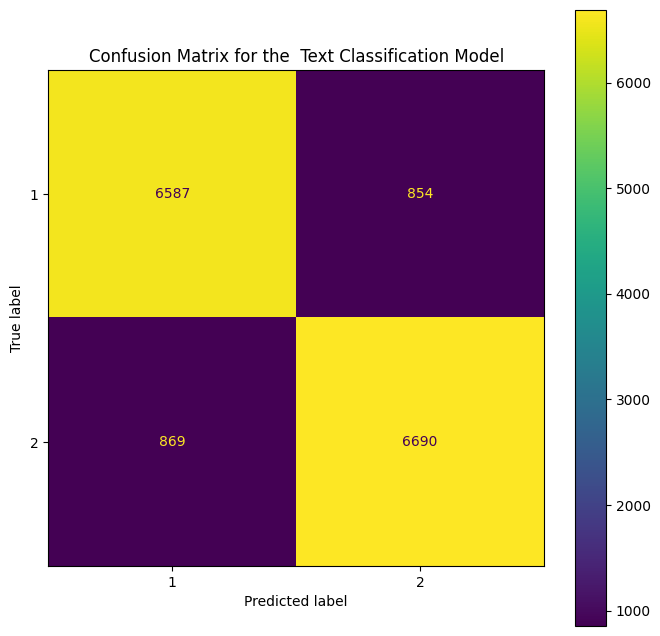

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['1','2']
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
ax.set(title='Confusion Matrix for the  Text Classification Model')
display.plot(ax=ax);